In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set( rc={'text.usetex' : True})
MyFont = {'FontName', 'Times New Roman', 'FontSize', 25};


[5]
[ 3  6  9 12 15 18]
[0.1 0.3 0.5 0.7]
[0.1 0.3 0.5 0.7 0.9]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
(63772, 22)
Index(['index', 'Unnamed: 0', 'budget', 'model', 'correct', 'wrong', 'total',
       'n_pref_input', 'n_pref_output', 'theta_size', 'theta_additivity',
       'n_items', 'n_test_subsets', 'n_tiers', 'alpha', 'p', 'evaluable',
       'ACR', 'AWR', 'RCR', 'RWR', 'Inferred Preferences'],
      dtype='object')


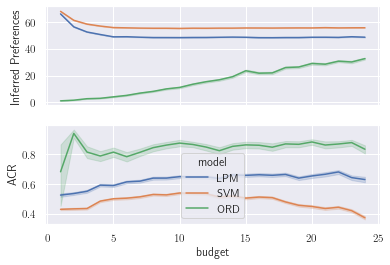

In [129]:
dfs=[]
EXP = "CARD_5"
for p in os.listdir(EXP):
    if p.startswith("."):
        continue
    df = pd.read_csv(os.path.join(EXP, p))
    dfs.append(df)
df = pd.concat(dfs).reset_index()

df["evaluable"] = (df["correct"] + df["wrong"])
df.loc[df["model"] == "CLF_UNION","model"] = "SVM"
df.loc[df["model"] == "ORD-UNION","model"] = "ORD"
df.loc[df["model"] == "CARD","model"] = "LPM"

#df = df[(df["model"] == "SVM") | (df["model"] == "Ordinal Model") | (df["model"] == "MS")]


#df = df[(df["real theta"] == True) | (df["real theta"] == False)]
df = df[df.evaluable > 0]
#df = df[(df["model"] == "Ordinal") ]


df["ACR"] = (df["correct"] ) / (df["total"] )
df["AWR"] = (df["wrong"] ) / (df["total"] )

df["RCR"] = (df["correct"] ) / (df["correct"] + df["wrong"] )
df["RWR"] = (df["wrong"] ) / (df["correct"] + df["wrong"] )
#df = df[df.budget >= 5]

df["Inferred Preferences"] = df["n_pref_output"]
#df = df[df.model == "Ordinal Model"]

p = 0.5
n_tiers = 7
alpha = 0.5


#df = df[df.evaluable > 0]
print(np.unique(df.n_items))
print(np.unique(df.n_tiers))
print(np.unique(df.alpha))
print(np.unique(df.p))
print(np.unique(df.budget))
print(df.shape)
print(df.columns)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
#fig.suptitle(r'$\alpha \in \{0.1, 0.3, 0.5, 0.7\}, p \in \{0.1, 0.3, 0.5, 0.7, 0.9\}$, $t \in \{0.1, 0.3, 0.5, 0.7, 0.9\}$')
s1 = sns.lineplot(data=df, x= "budget", y="ACR", hue = "model", ax = ax2)
s2 = sns.lineplot(data=df, x= "budget", y="Inferred Preferences", hue = "model", ax = ax1)
s2.get_legend().remove()

plt.savefig("CARD_COMP.png",bbox_inches="tight")

[5]
[6]
[0.1]
[0.1]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
(316, 22)
Index(['index', 'Unnamed: 0', 'budget', 'model', 'correct', 'wrong', 'total',
       'n_pref_input', 'n_pref_output', 'theta_size', 'theta_additivity',
       'n_items', 'n_test_subsets', 'n_tiers', 'alpha', 'p', 'evaluable',
       'ACR', 'AWR', 'RCR', 'RWR', 'Inferred Preferences'],
      dtype='object')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


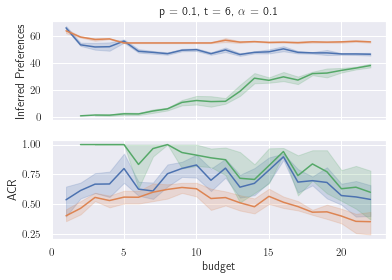

In [218]:
dfs=[]
EXP = "CARD_5"
for p in os.listdir(EXP):
    if p.startswith("."):
        continue
    df = pd.read_csv(os.path.join(EXP, p))
    dfs.append(df)
df = pd.concat(dfs).reset_index()

df["evaluable"] = (df["correct"] + df["wrong"])
df.loc[df["model"] == "CLF_UNION","model"] = "SVM"
df.loc[df["model"] == "ORD-UNION","model"] = "ORD"
df.loc[df["model"] == "CARD","model"] = "LPM"

#df = df[(df["model"] == "SVM") | (df["model"] == "Ordinal Model") | (df["model"] == "MS")]


#df = df[(df["real theta"] == True) | (df["real theta"] == False)]



df = df[df.evaluable > 0]
#df = df[(df["model"] == "Ordinal") ]


df["ACR"] = (df["correct"] ) / (df["total"] )
df["AWR"] = (df["wrong"] ) / (df["total"] )

df["RCR"] = (df["correct"] ) / (df["correct"] + df["wrong"] )
df["RWR"] = (df["wrong"] ) / (df["correct"] + df["wrong"] )
#df = df[df.budget >= 5]

df["Inferred Preferences"] = df["n_pref_output"]
#df = df[df.model == "Ordinal Model"]

p = 0.1
n_tiers = 6
alpha = 0.1

df = df[df.p == p]
df = df[df.n_tiers == n_tiers]
df = df[df.alpha == alpha]

#df = df[df.evaluable > 0]
print(np.unique(df.n_items))
print(np.unique(df.n_tiers))
print(np.unique(df.alpha))
print(np.unique(df.p))
print(np.unique(df.budget))
print(df.shape)
print(df.columns)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
#fig.suptitle(r'$\alpha \in \{0.1, 0.3, 0.5, 0.7\}, p \in \{0.1, 0.3, 0.5, 0.7, 0.9\}$, $t \in \{0.1, 0.3, 0.5, 0.7, 0.9\}$')
s1 = sns.lineplot(data=df, x= "budget", y="ACR", hue = "model", ax = ax2)
s2 = sns.lineplot(data=df, x= "budget", y="Inferred Preferences", hue = "model", ax = ax1)
s2.get_legend().remove()
s1.get_legend().remove()

s2.set(title = f"p = {p}, t = {n_tiers}, $\\alpha$ = {alpha}")
plt.savefig("CARD_COMP_01_01_6.eps",bbox_inches="tight", format="eps")


[5]
[12]
[0.5]
[0.5]
[ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
(286, 22)
Index(['index', 'Unnamed: 0', 'budget', 'model', 'correct', 'wrong', 'total',
       'n_pref_input', 'n_pref_output', 'theta_size', 'theta_additivity',
       'n_items', 'n_test_subsets', 'n_tiers', 'alpha', 'p', 'evaluable',
       'ACR', 'AWR', 'RCR', 'RWR', 'Inferred Preferences'],
      dtype='object')


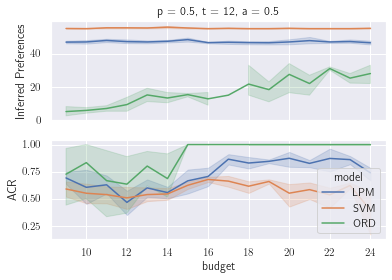

In [170]:
dfs=[]
EXP = "CARD_5"
for p in os.listdir(EXP):
    if p.startswith("."):
        continue
    df = pd.read_csv(os.path.join(EXP, p))
    dfs.append(df)
df = pd.concat(dfs).reset_index()

df["evaluable"] = (df["correct"] + df["wrong"])
df.loc[df["model"] == "CLF_UNION","model"] = "SVM"
df.loc[df["model"] == "ORD-UNION","model"] = "ORD"
df.loc[df["model"] == "CARD","model"] = "LPM"

#df = df[(df["model"] == "SVM") | (df["model"] == "Ordinal Model") | (df["model"] == "MS")]


#df = df[(df["real theta"] == True) | (df["real theta"] == False)]



df = df[df.evaluable > 0]
#df = df[(df["model"] == "Ordinal") ]


df["ACR"] = (df["correct"] ) / (df["total"] )
df["AWR"] = (df["wrong"] ) / (df["total"] )

df["RCR"] = (df["correct"] ) / (df["correct"] + df["wrong"] )
df["RWR"] = (df["wrong"] ) / (df["correct"] + df["wrong"] )
#df = df[df.budget >= 5]

df["Inferred Preferences"] = df["n_pref_output"]
#df = df[df.model == "Ordinal Model"]

p = 0.5
n_tiers = 12
alpha = 0.5

df = df[df.p == p]
df = df[df.n_tiers == n_tiers]
df = df[df.alpha == alpha]

df = df[df.evaluable > 0]
df = df[df.budget > 8]

print(np.unique(df.n_items))
print(np.unique(df.n_tiers))
print(np.unique(df.alpha))
print(np.unique(df.p))
print(np.unique(df.budget))
print(df.shape)
print(df.columns)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
#fig.suptitle(r'$\alpha \in \{0.1, 0.3, 0.5, 0.7\}, p \in \{0.1, 0.3, 0.5, 0.7, 0.9\}$, $t \in \{0.1, 0.3, 0.5, 0.7, 0.9\}$')
s1 = sns.lineplot(data=df, x= "budget", y="ACR", hue = "model", ax = ax2)
s2 = sns.lineplot(data=df, x= "budget", y="Inferred Preferences", hue = "model", ax = ax1)
s2.get_legend().remove()
#s2.set(title = f"p = {p}, t = {n_tiers}, a = {alpha}")
plt.savefig("CARD_COMP_05_05_12.png",bbox_inches="tight")

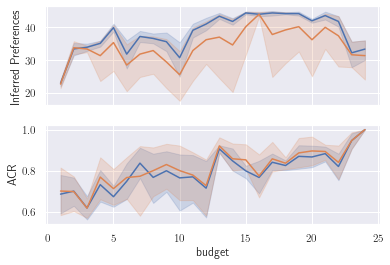

In [7]:
s=[]
EXP = "THETA_VS_NOTHETA_1"
dfs = []
for p in os.listdir(EXP):
    if p.startswith("."):
        continue
    df = pd.read_csv(os.path.join(EXP, p))
    dfs.append(df)
    
df = pd.concat(dfs).reset_index()

df["evaluable"] = (df["correct"] + df["wrong"])

df.loc[df["model"] == "CLF_UNION","model"] = "SVM"
df.loc[df["model"] == "ORD-UNION","model"] = "Ordinal"
df.loc[df["model"] == "CARD","model"] = "MS"

df.loc[df["real theta"] == True,"real theta"] = "User's model"
df.loc[df["real theta"] == False,"real theta"] = "Unifying Model"

df["Theta"] = df["real theta"]

df = df[df.evaluable > 0]
df = df[(df["model"] == "Ordinal") ]

p = 0.3
n_tiers = 9
alpha = 0.3


df = df[df.p == p]
df = df[df.n_tiers == n_tiers]
df = df[df.alpha == alpha]

df["ACR"] = (df["correct"] ) / (df["total"] )
df["AWR"] = (df["wrong"] ) / (df["total"] )

df["RCR"] = (df["correct"] ) / (df["correct"] + df["wrong"] )
df["RWR"] = (df["wrong"] ) / (df["correct"] + df["wrong"] )
#df = df[df.budget >= 5]


df["Inferred Preferences"] = df["n_pref_output"]
#df = df[df.model == "Ordinal Model"]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
#fig.suptitle(r'$\alpha \in \{0.1, 0.3, 0.5, 0.7\}, p \in \{0.1, 0.3, 0.5, 0.7, 0.9\}$, $t \in \{0.1, 0.3, 0.5, 0.7, 0.9\}$')
s1 = sns.lineplot(data=df, x= "budget", y="ACR", hue = "Theta", ax = ax2)
s2 = sns.lineplot(data=df, x= "budget", y="Inferred Preferences", hue = "Theta", ax = ax1)
s2.get_legend().remove()
s1.get_legend().remove()

#s2.set(title = f"$\\alpha = {alpha}$, $p = {p}$, $t = {n_tiers}$")

plt.savefig("THETA_ORD_COMP_03_03_9.png",bbox_inches="tight", format = "png")

[5]
[ 3  6  9 12 15 18]
[0.1 0.3]
[0.1 0.3 0.5 0.7 0.9]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
(55848, 18)


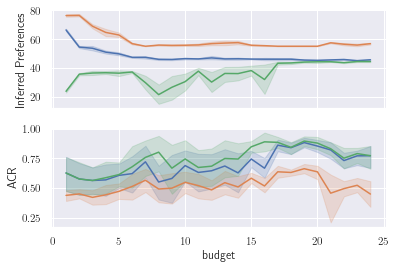

In [235]:
s=[]
EXP = "THETA_VS_NOTHETA_03_03_9"
dfs = []
for p in os.listdir(EXP):
    if p.startswith("."):
        continue
    df = pd.read_csv(os.path.join(EXP, p))
    dfs.append(df)
df = pd.concat(dfs).reset_index()

df["evaluable"] = (df["correct"] + df["wrong"])
df.loc[df["model"] == "CLF_UNION","model"] = "SVM"
df.loc[df["model"] == "ORD-UNION","model"] = "ORD"
df.loc[df["model"] == "CARD","model"] = "LPM"

#df = df[(df["model"] == "SVM") | (df["model"] == "Ordinal") | (df["model"] == "MS")]


df = df[df.evaluable > 0]
print(np.unique(df.n_items))
print(np.unique(df.n_tiers))
print(np.unique(df.alpha))
print(np.unique(df.p))
print(np.unique(df.budget))
print(df.shape)
df = df[(df["real theta"] == False)]

p = 0.5
n_tiers = 9
alpha = 0.3


df = df[df.p == p]
df = df[df.n_tiers == n_tiers]
df = df[df.alpha == alpha]

df["ACR"] = (df["correct"] ) / (df["total"] )
df["AWR"] = (df["wrong"] ) / (df["total"] )

df["RCR"] = (df["correct"] ) / (df["correct"] + df["wrong"] )
df["RWR"] = (df["wrong"] ) / (df["correct"] + df["wrong"] )
#df = df[df.budget >= 5]

df["Inferred Preferences"] = df["n_pref_output"]
#df = df[df.model == "Ordinal Model"]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
#fig.suptitle(r'$\alpha \in \{0.1, 0.3, 0.5, 0.7\}, p \in \{0.1, 0.3, 0.5, 0.7, 0.9\}$, $t \in \{0.1, 0.3, 0.5, 0.7, 0.9\}$')
s1 = sns.lineplot(data=df, x= "budget", y="ACR", hue = "model", ax = ax2)
s2 = sns.lineplot(data=df, x= "budget", y="Inferred Preferences", hue = "model", ax = ax1)
s2.get_legend().remove()
s1.get_legend().remove()
#s2.set(title = f"$\\alpha = {alpha}$, $p = {p}$, $t = {n_tiers}$")

plt.savefig(f"{EXP}.png",bbox_inches="tight", format="png")

[5]
[ 3  6  9 12 15 18]
[0.1 0.3]
[0.1 0.3 0.5 0.7 0.9]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
(51219, 18)


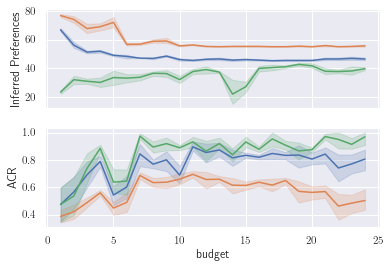

In [4]:
s=[]
dfs = []

EXP = "THETA_VS_NOTHETA_1"
for p in os.listdir(EXP):
    if p.startswith("."):
        continue
    df = pd.read_csv(os.path.join(EXP, p))
    dfs.append(df)
df = pd.concat(dfs).reset_index()

df["evaluable"] = (df["correct"] + df["wrong"])
df.loc[df["model"] == "CLF_UNION","model"] = "SVM"
df.loc[df["model"] == "ORD-UNION","model"] = "ORD"
df.loc[df["model"] == "CARD","model"] = "LPM"

#df = df[(df["model"] == "SVM") | (df["model"] == "Ordinal") | (df["model"] == "MS")]


df = df[df.evaluable > 0]
print(np.unique(df.n_items))
print(np.unique(df.n_tiers))
print(np.unique(df.alpha))
print(np.unique(df.p))
print(np.unique(df.budget))
print(df.shape)
df = df[(df["real theta"] == False)]

p = 0.1
n_tiers = 9
alpha = 0.1


df = df[df.p == p]
df = df[df.n_tiers == n_tiers]
df = df[df.alpha == alpha]

df["ACR"] = (df["correct"] ) / (df["total"] )
df["AWR"] = (df["wrong"] ) / (df["total"] )

df["RCR"] = (df["correct"] ) / (df["correct"] + df["wrong"] )
df["RWR"] = (df["wrong"] ) / (df["correct"] + df["wrong"] )
#df = df[df.budget >= 5]

df["Inferred Preferences"] = df["n_pref_output"]
#df = df[df.model == "Ordinal Model"]

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
#fig.suptitle(r'$\alpha \in \{0.1, 0.3, 0.5, 0.7\}, p \in \{0.1, 0.3, 0.5, 0.7, 0.9\}$, $t \in \{0.1, 0.3, 0.5, 0.7, 0.9\}$')
s1 = sns.lineplot(data=df, x= "budget", y="ACR", hue = "model", ax = ax2)
s2 = sns.lineplot(data=df, x= "budget", y="Inferred Preferences", hue = "model", ax = ax1)
s2.get_legend().remove()
s1.get_legend().remove()
#s2.set(title = f"$\\alpha = {alpha}$, $p = {p}$, $t = {n_tiers}$")

plt.savefig("THETA_ORD_CARD_01_01_9.png",bbox_inches="tight", format="png")

[5]
[12]
[0.1]
[0.1]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
(3460, 22)
Index(['index', 'Unnamed: 0', 'budget', 'model', 'correct', 'wrong', 'total',
       'n_pref_input', 'n_pref_output', 'theta_size', 'theta_additivity',
       'n_items', 'n_test_subsets', 'n_tiers', 'alpha', 'p', 'evaluable',
       'ACR', 'AWR', 'RCR', 'RWR', 'Inferred Preferences'],
      dtype='object')


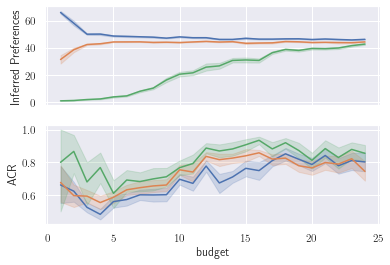

In [5]:
dfs=[]
EXP = "CARD_01_01_12"
for p in os.listdir(EXP):
    if p.startswith("."):
        continue
    df = pd.read_csv(os.path.join(EXP, p))
    dfs.append(df)
df = pd.concat(dfs).reset_index()

df["evaluable"] = (df["correct"] + df["wrong"])
df.loc[df["model"] == "CLF_UNION","model"] = "SVM"
df.loc[df["model"] == "ORD-UNION","model"] = "ORD"
df.loc[df["model"] == "CARD","model"] = "LPM"

#df = df[(df["model"] == "SVM") | (df["model"] == "Ordinal Model") | (df["model"] == "MS")]


#df = df[(df["real theta"] == True) | (df["real theta"] == False)]



df = df[df.evaluable > 0]
#df = df[(df["model"] == "Ordinal") ]


df["ACR"] = (df["correct"] ) / (df["total"] )
df["AWR"] = (df["wrong"] ) / (df["total"] )

df["RCR"] = (df["correct"] ) / (df["correct"] + df["wrong"] )
df["RWR"] = (df["wrong"] ) / (df["correct"] + df["wrong"] )
#df = df[df.budget >= 5]

df["Inferred Preferences"] = df["n_pref_output"]
#df = df[df.model == "Ordinal Model"]
#df = df[df.evaluable > 0]
print(np.unique(df.n_items))
print(np.unique(df.n_tiers))
print(np.unique(df.alpha))
print(np.unique(df.p))
print(np.unique(df.budget))
print(df.shape)
print(df.columns)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
#fig.suptitle(r'$\alpha \in \{0.1, 0.3, 0.5, 0.7\}, p \in \{0.1, 0.3, 0.5, 0.7, 0.9\}$, $t \in \{0.1, 0.3, 0.5, 0.7, 0.9\}$')
s1 = sns.lineplot(data=df, x= "budget", y="ACR", hue = "model", ax = ax2)
s2 = sns.lineplot(data=df, x= "budget", y="Inferred Preferences", hue = "model", ax = ax1)
s2.get_legend().remove()
s1.get_legend().remove()
p = 0.1
alpha = 0.1
n_tiers = 12
#s2.set(title = f"$\\alpha = {alpha}$, $p = {p}$, $t = {n_tiers}$")
plt.savefig("CARD_COMP_01_01_12.png",bbox_inches="tight", format = "png")

[5]
[12]
[0.3]
[0.3]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
(2091, 22)
Index(['index', 'Unnamed: 0', 'budget', 'model', 'correct', 'wrong', 'total',
       'n_pref_input', 'n_pref_output', 'theta_size', 'theta_additivity',
       'n_items', 'n_test_subsets', 'n_tiers', 'alpha', 'p', 'evaluable',
       'ACR', 'AWR', 'RCR', 'RWR', 'Inferred Preferences'],
      dtype='object')


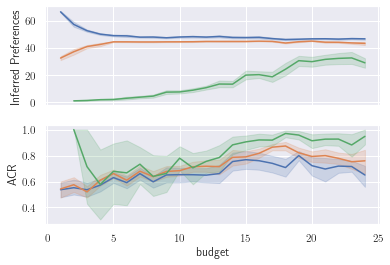

In [237]:
dfs=[]
EXP = "CARD_03_03_12"
for p in os.listdir(EXP):
    if p.startswith("."):
        continue
    df = pd.read_csv(os.path.join(EXP, p))
    dfs.append(df)
df = pd.concat(dfs).reset_index()

df["evaluable"] = (df["correct"] + df["wrong"])
df.loc[df["model"] == "CLF_UNION","model"] = "SVM"
df.loc[df["model"] == "ORD-UNION","model"] = "ORD"
df.loc[df["model"] == "CARD","model"] = "LPM"

#df = df[(df["model"] == "SVM") | (df["model"] == "Ordinal Model") | (df["model"] == "MS")]


#df = df[(df["real theta"] == True) | (df["real theta"] == False)]



df = df[df.evaluable > 0]
#df = df[(df["model"] == "Ordinal") ]


df["ACR"] = (df["correct"] ) / (df["total"] )
df["AWR"] = (df["wrong"] ) / (df["total"] )

df["RCR"] = (df["correct"] ) / (df["correct"] + df["wrong"] )
df["RWR"] = (df["wrong"] ) / (df["correct"] + df["wrong"] )
#df = df[df.budget >= 5]

df["Inferred Preferences"] = df["n_pref_output"]
#df = df[df.model == "Ordinal Model"]
#df = df[df.evaluable > 0]
print(np.unique(df.n_items))
print(np.unique(df.n_tiers))
print(np.unique(df.alpha))
print(np.unique(df.p))
print(np.unique(df.budget))
print(df.shape)
print(df.columns)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
#fig.suptitle(r'$\alpha \in \{0.1, 0.3, 0.5, 0.7\}, p \in \{0.1, 0.3, 0.5, 0.7, 0.9\}$, $t \in \{0.1, 0.3, 0.5, 0.7, 0.9\}$')
s1 = sns.lineplot(data=df, x= "budget", y="ACR", hue = "model", ax = ax2)
s2 = sns.lineplot(data=df, x= "budget", y="Inferred Preferences", hue = "model", ax = ax1)
s2.get_legend().remove()
s1.get_legend().remove()
p = 0.3
alpha = 0.3
n_tiers = 12
plt.savefig("CARD_COMP_03_03_12.png",bbox_inches="tight", format = "png")